In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = df.drop(columns=['petal_width', 'species'])
y = df['petal_width']

In [6]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [7]:
ml = DecisionTreeRegressor()
ada = AdaBoostRegressor(base_estimator=ml, n_estimators=50, learning_rate=1)

In [8]:
# train model
ada.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1)

In [9]:
# dự đoán trên dữ liệu mới
X_new = [[4.5, 3.1, 1.4],
         [6.5, 3.0, 4.3],
         [5.9, 3.1, 5.2]]
y_new = ada.predict(X_new)
y_new

c:\program files\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([0.2, 1.4, 1.9])

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
scores = cross_val_score(ada, X, y, cv=5)
scores

array([-0.52714932,  0.94721601,  0.5325779 ,  0.69834801, -0.17977528])

In [12]:
scores.mean()

0.2942434649088145

In [13]:
ml.fit(X, y)

DecisionTreeRegressor()

In [14]:
y_new2 = ml.predict(X_new)
y_new2

c:\program files\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.2, 1.4, 2.3])

In [15]:
scores2 = cross_val_score(ml, X, y, cv=5)
scores2

array([-1.81674208e+00,  8.51270115e-01,  1.41643059e-03,  6.02336084e-01,
       -1.01360142e+00])

In [16]:
y_predict_ada = ada.predict(X)
y_predict_ml = ml.predict(X)

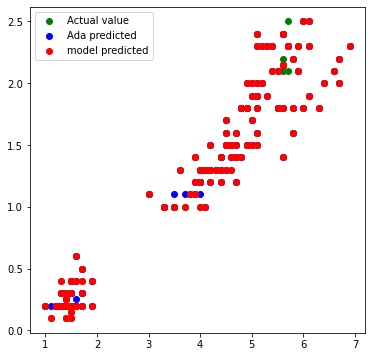

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(X['petal_length'], y, c='green', label='Actual value')
plt.scatter(X['petal_length'], y_predict_ada, c='blue', label='Ada predicted')
plt.scatter(X['petal_length'], y_predict_ml, c='red', label='model predicted')
plt.legend()
plt.show()